In [279]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, metrics
import pandas as pd
import numpy as np


In [137]:
df = pd.read_csv('data/PBP - 2016 - Week 1.csv')
df4 = pd.read_csv('./data/PBP - 2016 - Week 4.csv')
df5 = pd.read_csv('./data/PBP - 2016 - Week 5.csv')
df6 = pd.read_csv('./data/PBP - 2016 - Week 6.csv')
df7 = pd.read_csv('./data/PBP - 2016 - Week 7.csv')
df8 = pd.read_csv('./data/PBP - 2016 - Week 8.csv')
df9 = pd.read_csv('./data/PBP - 2016 - Week 9.csv')
df10 = pd.read_csv('./data/PBP - 2016 - Week 10.csv')
df11 = pd.read_csv('./data/PBP - 2016 - Week 11.csv')
df = pd.concat([df, df4, df5, df6, df7, df8, df9, df10, df11])
df = df.dropna()
# week2 = pd.read_csv('PBP - 2016 - Week 2.csv')

# df = pd.concat([week1,week2],ignore_index=True)

In [138]:
df['type'].unique()

array(['Kickoff', 'Timeout', 'Rush', 'Punt', 'Pass Reception', 'Penalty',
       'Pass Incompletion', 'Rushing Touchdown', 'Field Goal Good',
       'Passing Touchdown', 'Fumble Recovery (Own)', 'End Period', 'Sack',
       'End of Half', 'Fumble Recovery (Opponent)', 'End of Game',
       'Field Goal Missed', 'Safety', 'Pass Interception Return',
       'Blocked Field Goal', 'Defensive 2pt Conversion',
       'Kickoff Return (Offense)', 'Interception Return Touchdown',
       'Kickoff Return Touchdown', 'Punt Return Touchdown',
       'Blocked Punt', 'Fumble Return Touchdown',
       'Missed Field Goal Return', 'Blocked Field Goal Touchdown',
       'Blocked Punt Touchdown', 'Coin Toss'], dtype=object)

In [139]:
df = df.replace('Pass Incompletion', 'Pass')
df = df.replace('Pass Reception', 'Pass')
df = df.replace('Passing Touchdown', 'Pass')
df = df.replace('Rushing Touchdown', 'Rush')
df = df.replace('Pass Interception Return', 'Pass')
df = df.replace('Interception Return Touchdown', 'Pass')
df = df.replace('Sack', 'Pass')
df['type'].unique()

array(['Kickoff', 'Timeout', 'Rush', 'Punt', 'Pass', 'Penalty',
       'Field Goal Good', 'Fumble Recovery (Own)', 'End Period',
       'End of Half', 'Fumble Recovery (Opponent)', 'End of Game',
       'Field Goal Missed', 'Safety', 'Blocked Field Goal',
       'Defensive 2pt Conversion', 'Kickoff Return (Offense)',
       'Kickoff Return Touchdown', 'Punt Return Touchdown',
       'Blocked Punt', 'Fumble Return Touchdown',
       'Missed Field Goal Return', 'Blocked Field Goal Touchdown',
       'Blocked Punt Touchdown', 'Coin Toss'], dtype=object)

In [140]:
df

,gameId,year,week,homeId,homeTeam,homeAbbr,awayId,awayTeam,awayAbbr,driveIndex,...,quarter,clock,wallclock,type,down,distance,yardLine,yardsGained,endYardLine,description
0,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,0,...,1,15:00,2016-09-03T06:36:41Z,Kickoff,1,10,35,10,86,"Drew Galitz kickoff for 61 yds , Shakeir Ryan ..."
1,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,0,...,1,14:55,2016-09-03T06:38:11Z,Timeout,1,10,86,0,86,"Timeout NORTHWESTERN ST, clock 14:55"
2,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,0,...,1,14:55,2016-09-03T06:38:11Z,Rush,1,10,86,-1,87,De'Mard Llorens run for a loss of 1 yard to th...
3,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,0,...,1,14:55,2016-09-03T06:38:11Z,Rush,2,11,87,8,79,De'Mard Llorens run for 8 yds to the NWSt 21
4,400868876,2016,1,239,Baylor,BAY,2466,Northwestern St,NWST,0,...,1,14:55,2016-09-03T06:38:11Z,Rush,3,3,79,0,79,De'Mard Llorens run for no gain to the NWSt 21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10385,400869846,2016,11,326,Texas State,TXST,70,Idaho,IDHO,24,...,4,1:50,2016-11-13T08:08:50Z,Punt,4,8,51,0,83,"Lumi Kaba punt for 32 yds, fair catch by Alfon..."
10386,400869846,2016,11,326,Texas State,TXST,70,Idaho,IDHO,25,...,4,1:42,2016-11-13T08:11:05Z,Rush,1,10,83,2,81,Doug Coman run for 2 yds to the Idaho 19
10387,400869846,2016,11,326,Texas State,TXST,70,Idaho,IDHO,25,...,4,1:42,2016-11-13T08:11:05Z,Rush,2,8,81,2,79,Gunnar Amos run for 2 yds to the Idaho 21
10388,400869846,2016,11,326,Texas State,TXST,70,Idaho,IDHO,25,...,4,1:42,2016-11-13T08:11:05Z,Penalty,3,6,79,-5,84,"IDAHO Penalty, delay of game (Gunnar Amos) to ..."


In [141]:
new_df = df[['quarter', 'down', 'distance', 'yardLine', 'clock', 'type']]

In [142]:
def seconds_left_in_quarter(clock):
    clock = clock.split(':')
    clock = (int(clock[0])*60) + int(clock[1])
    return clock

In [143]:
seconds_left_in_quarter('15:20')

920

In [144]:
for index,row in new_df.iterrows():
    new_df.at[index,'clock'] = seconds_left_in_quarter(row['clock'])

In [145]:
new_df

,quarter,down,distance,yardLine,clock,type
0,1,1,10,35,900,Kickoff
1,1,1,10,86,885,Timeout
2,1,1,10,86,843,Rush
3,1,2,11,87,807,Rush
4,1,3,3,79,800,Rush
...,...,...,...,...,...,...
10385,4,4,8,51,110,Punt
10386,4,1,10,83,102,Rush
10387,4,2,8,81,102,Rush
10388,4,3,6,79,102,Penalty


In [146]:
new_df = new_df[(new_df.type == 'Pass') | (new_df.type == 'Rush')]

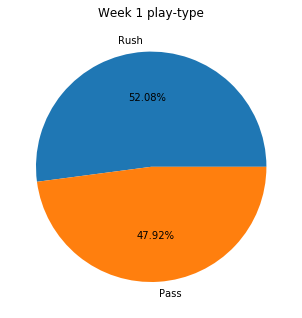

In [147]:
rel_freq = new_df['type'].value_counts()

plt.pie(rel_freq, labels = ('Rush', 'Pass'), autopct='%.2f%%')
plt.title("Week 1 play-type")
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.show()

In [148]:
training_features = new_df[['quarter','down','distance','yardLine', 'clock']]

training_label = new_df['type']


In [149]:
gbr = ensemble.GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.005)

gbr.fit(training_features, training_label)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.005, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [150]:
prediction = gbr.predict(training_features)

accuracy = accuracy_score(training_label, prediction)

print("Accuracy: "+"{:.2%}".format(accuracy))

Accuracy: 61.91%


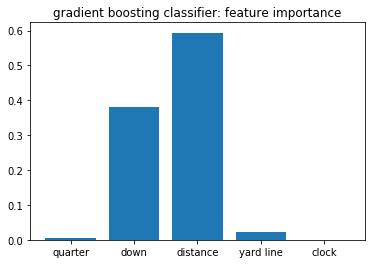

In [152]:
features = ['quarter', 'down', 'distance', 'yard line', 'clock']
feature_importance = gbr.feature_importances_.tolist()

plt.bar(features,feature_importance)
plt.title("gradient boosting classifier: feature importance")
plt.show()

## Testing with week 2

In [153]:
def make_new_validation(df):
    df = df.replace('Pass Incompletion', 'Pass')
    df = df.replace('Pass Reception', 'Pass')
    df = df.replace('Passing Touchdown', 'Pass')
    df = df.replace('Rushing Touchdown', 'Rush')
    df = df.replace('Sack', 'Pass')
    for index,row in df.iterrows():
        df.at[index,'clock'] = seconds_left_in_quarter(row['clock'])
    new_df = df[['quarter', 'down', 'distance', 'yardLine', 'clock', 'type']]
    new_df = new_df[(new_df.type == 'Pass') | (new_df.type == 'Rush')]
    features = new_df[['quarter','down','distance','yardLine', 'clock']]
    labels = new_df['type']
    return features, labels
    

In [154]:
week2 = pd.read_csv('data/PBP - 2016 - Week 2.csv')
week2_features, week2_labels = make_new_validation(week2)

In [155]:
prediction = gbr.predict(week2_features)

accuracy = accuracy_score(week2_labels, prediction)

print("Accuracy: "+"{:.2%}".format(accuracy))

Accuracy: 61.94%


In [156]:
week3 = pd.read_csv('data/PBP - 2016 - Week 3.csv')
week3_features, week3_labels = make_new_validation(week3)

In [157]:
prediction = gbr.predict(week3_features)

accuracy = accuracy_score(week3_labels, prediction)

print("Accuracy: "+"{:.2%}".format(accuracy))


Accuracy: 62.51%


In [158]:
np.unique(prediction)

array(['Pass', 'Rush'], dtype=object)

In [159]:
new_pred = np.where(prediction=='Rush', False, prediction) 
new_pred = np.where(new_pred=='Pass', True, new_pred) 

new_leb = np.where(week3_labels=='Pass', True, week3_labels) 
new_leb = np.where(new_leb=='Rush', False, new_leb) 

In [160]:
new_pred.astype('bool')

array([False, False,  True, ..., False, False,  True])

In [161]:
from sklearn.metrics import roc_auc_score
roc_auc_score(new_leb.astype('bool'), new_pred.astype('bool'))

0.6082527014007376

In [37]:
import pickle
filename = 'models/predict_play.sav'
pickle.dump(gbr, open(filename, 'wb'))

## Trying with adding in offense stats

In [115]:
offense_stats = pd.read_csv('./data/Offense Stats 2016.csv')

In [116]:
df = df.join(offense_stats.set_index('School'), on='homeTeam')
df = df.dropna()

In [118]:
df = df.query('homeTeam == offenseTeam')

In [120]:
df = df[(df.type == 'Pass') | (df.type == 'Rush')]

In [121]:
big_features = df[['quarter','down','distance','yardLine','Passing Completion', 'Pass Attemps',
       'completion percentage', 'passing yards', 'Passing Touchdowns',
       'Rush Attempts', 'Rushing yards', 'rush average', 'Rush Touchdowns',
       'First down by pass', 'First down by rush']]

big_labels = df['type']


In [122]:
gbr = ensemble.GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.005)

gbr.fit(big_features, big_labels)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.005, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [123]:
prediction = gbr.predict(big_features)

accuracy = accuracy_score(big_labels, prediction)

print("Accuracy: "+"{:.2%}".format(accuracy))

Accuracy: 63.70%


In [166]:
def make_new_validation_2(df):
    offense_stats = pd.read_csv('./data/Offense Stats 2016.csv')
    df = df.join(offense_stats.set_index('School'), on='homeTeam')
    df = df.dropna()
    df = df.replace('Pass Incompletion', 'Pass')
    df = df.replace('Pass Reception', 'Pass')
    df = df.replace('Passing Touchdown', 'Pass')
    df = df.replace('Rushing Touchdown', 'Rush')
    df = df.replace('Sack', 'Pass')
    
    new_df = df[['quarter','down','distance','yardLine','Passing Completion', 'Pass Attemps',
       'completion percentage', 'passing yards', 'Passing Touchdowns',
       'Rush Attempts', 'Rushing yards', 'rush average', 'Rush Touchdowns',
       'First down by pass', 'First down by rush', 'type']]
    new_df = new_df[(new_df.type == 'Pass') | (new_df.type == 'Rush')]
    features = new_df[['quarter','down','distance','yardLine','Passing Completion', 'Pass Attemps',
       'completion percentage', 'passing yards', 'Passing Touchdowns',
       'Rush Attempts', 'Rushing yards', 'rush average', 'Rush Touchdowns',
       'First down by pass', 'First down by rush']]
    labels = new_df['type']
    return features, labels

In [167]:
week2 = pd.read_csv('data/PBP - 2016 - Week 2.csv')
week2_features, week2_labels = make_new_validation_2(week2)

In [131]:
prediction = gbr.predict(week2_features)

accuracy = accuracy_score(week2_labels, prediction)

print("Accuracy: "+"{:.2%}".format(accuracy))

Accuracy: 60.56%


In [133]:
new_pred = np.where(prediction=='Rush', False, prediction) 
new_pred = np.where(new_pred=='Pass', True, new_pred) 

new_leb = np.where(week2_labels=='Pass', True, week2_labels) 
new_leb = np.where(new_leb=='Rush', False, new_leb) 

In [134]:
new_pred.astype('bool')

array([False, False, False, ..., False, False, False])

In [135]:
roc_auc_score(new_leb.astype('bool'), new_pred.astype('bool'))

0.5872603228372458

## XGB probs prediction because i need it for something else

In [162]:
import xgboost as xgb

In [264]:
clf = xgb.XGBClassifier(max_depth=3, learning_rate=.05)
clf.fit(big_features, big_labels,eval_metric='auc')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [265]:
preds = clf.predict(week2_features)

In [266]:
clf.predict_proba(week2_features[1: 2])

array([[0.4477951, 0.5522049]], dtype=float32)

In [267]:
clf.score(week2_features, week2_labels)

0.621343169676927

In [286]:
clf.score(big_features, big_labels)

0.6627221992558908

In [269]:
new_pred = np.where(preds=='Rush', False, preds) 
new_pred = np.where(new_pred=='Pass', True, new_pred) 


week2_labels_bool = week2_labels.replace('Rush', 0)
week2_labels_bool = week2_labels_bool.replace('Pass', 1)
roc_auc_score(week2_labels_bool.astype('bool'), new_pred.astype('bool'))

0.611470325412633

In [295]:
preds = clf.predict(big_features)
new_pred = np.where(preds=='Rush', False, preds) 
new_pred = np.where(new_pred=='Pass', True, new_pred) 


labels_bool = big_labels.replace('Rush', 0)
labels_bool = labels_bool.replace('Pass', 1)
roc_auc_score(labels_bool.astype('bool'), new_pred.astype('bool'))

0.6443989325363302

In [270]:
confusion_matrix = metrics.confusion_matrix(week2_labels, clf.predict(week2_features))

In [271]:
confusion_matrix

array([[1596, 2122],
       [ 855, 3289]])

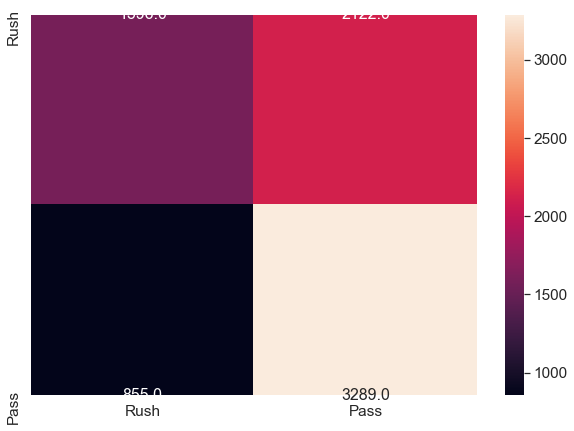

In [285]:
plt.figure(figsize = (10,7))

sns.set(font_scale=1.4)#for label size
sns.heatmap(confusion_matrix, annot=True,annot_kws={"size": 16}, fmt=".1f",
            xticklabels=['Rush','Pass'], yticklabels=['Rush','Pass'])# font size


In [296]:
clf.feature_importances_

array([0.03963648, 0.21832258, 0.10192546, 0.03413237, 0.09426178,
       0.11004891, 0.01735536, 0.02855761, 0.02707511, 0.05121208,
       0.1649931 , 0.01159611, 0.02953653, 0.02348817, 0.04785836],
      dtype=float32)